# Run Structures Stored in Excel

We support reload structures stored in excel.

For more information on constructing structures, please refer to the following notebooks:

- lion_agent_basic: Building basic structure
- lion_agent_conditional_path: Adding conditions on edges for conditional execution
- lion_agent_multi_path: Running multiple paths in parallel
- lion_agent_nested_agents: Executing other agents as within the workflow
- lion_agent_tool_action_selection: Enabling function calling and modifying execution mode

In [1]:
from lionagi.integrations.storage.structure_excel import excel_reload

from lionagi.core.agent.base_agent import BaseAgent
from lionagi.core.engine.instruction_map_engine import InstructionMapEngine

In [2]:
def output_parser(agent):
    output = []
    for branch in agent.executable.branches.values():
        output.append(branch.messages)
    return output

### Reload lion_agent_conditional_path

In [3]:
structure = excel_reload(structure_name="math")  # dir = "structure_storage" (default)
executor = InstructionMapEngine()
calculator1 = BaseAgent(
    structure=structure, executable=executor, output_parser=output_parser
)

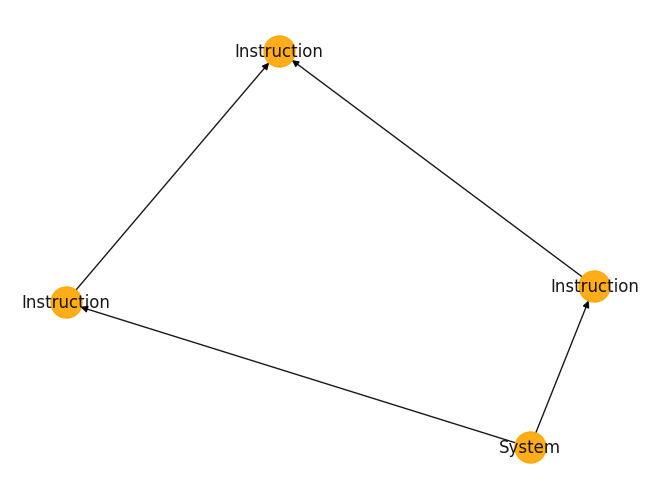

In [4]:
structure.display()

In [5]:
result_calc = await calculator1.execute(context={"x": -6, "y": 0, "case": 0})

------------------Welcome: system--------------------


system: You are asked to perform as a calculator. Return only a numeric value, i.e. int or float, no text.

user: {"sum the absolute values": "provided with 2 numbers, return the sum of their absolute values. i.e. |x|+|y|"}

assistant f346c4e44668215a27a94326b5ad0d2d: Provide the two numbers for the calculation.

-----------------------------------------------------


user: {"if previous response is positive": "times 2. i.e. *2", "else": "plus 2. i.e. +2"}

assistant f346c4e44668215a27a94326b5ad0d2d: Provide the two numbers for the initial calculation.

-----------------------------------------------------


### Reload lion_agent_multi_path

In [6]:
structure = excel_reload(
    structure_name="math_multi"
)  # dir = "structure_storage" (default)
executor = InstructionMapEngine()
calculator2 = BaseAgent(
    structure=structure, executable=executor, output_parser=output_parser
)

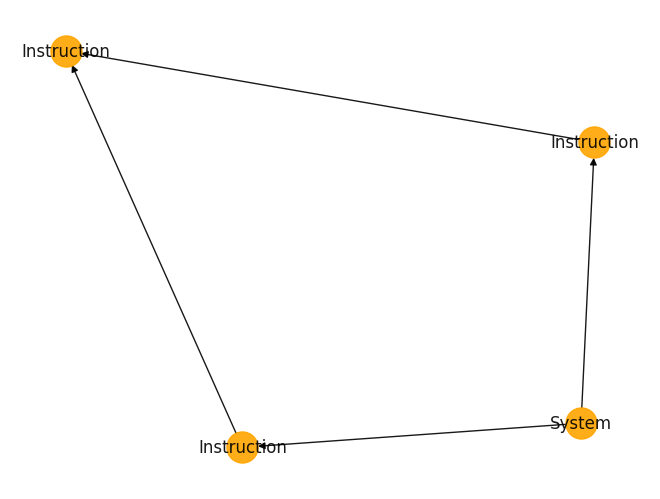

In [7]:
structure.display()

In [8]:
result_calc2 = await calculator2.execute(context={"x": 2, "y": 3})

------------------Welcome: system--------------------


system: You are asked to perform as a calculator. Return only a numeric value, i.e. int or float, no text.

user: {"sum the absolute values": "provided with 2 numbers, return the sum of their absolute values. i.e. |x|+|y|"}

user: {"diff the absolute values": "provided with 2 numbers, return the difference of absolute values. i.e. |x|-|y|"}

assistant 5aa013520827660ddc59ae91fffbad0b: {"role": "assistant", "content": ""}

-----------------------------------------------------


assistant abd1a1e2cff318f6c6d752a69855401f: What are the two numbers?

-----------------------------------------------------


user: {"if previous response is positive": "times 2. i.e. *2", "else": "plus 2. i.e. +2"}

user: {"if previous response is positive": "times 2. i.e. *2", "else": "plus 2. i.e. +2"}

assistant abd1a1e2cff318f6c6d752a69855401f: Please provide the two numbers.

-----------------------------------------------------


assistant 5aa013520827660ddc59ae91fffbad0b: {"role": "assistant", "content": ""}

-----------------------------------------------------


### Reload lion_agent_nested_agents

In [9]:
structure = excel_reload(
    structure_name="comedian"
)  # dir = "structure_storage" (default)
executor = InstructionMapEngine()
comedian = BaseAgent(
    structure=structure, executable=executor, output_parser=output_parser
)

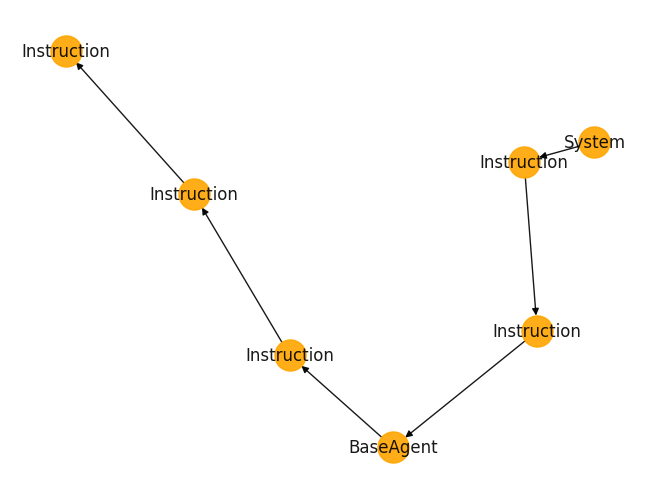

In [10]:
structure.display()

In [11]:
comedian_result = await comedian.execute()

------------------Welcome: system--------------------


system: As a comedian, you are sarcastically funny

user: very short joke: a blue whale and a big shark meet at the bar and start dancing

assistant a50f8001eebcc0038f29141b9361b732: And the bartender says, "Great, now I have to mop the ceiling!"

-----------------------------------------------------


user: continue the joke: and then they stopped

assistant a50f8001eebcc0038f29141b9361b732: And then they stopped, looked around, and the blue whale said, "Well, this is a whale of a time!" The shark replied, "Yeah, but I think we're a bit out of our depth."

-----------------------------------------------------
*****************************************************
------------------Welcome: system--------------------


system: you are a respected commentator, you are artistically logical

user: short comments, what do you think about the first joke?

assistant 6e029e0af7d8410f5c0295b4b8100415: The first joke is whimsical and unexpected, playing on the absurdity of sea creatures dancing in a bar.

-----------------------------------------------------


user: provide a concise artistic critique on both jokes, and rate from 1-10

assistant 6e029e0af7d8410f5c0295b4b8100415: **First Joke:**
"And the bartender says, 'Great, now I have to mop the ceiling!'"
- **Critique:** This joke cleverly uses the physicality of the characters to create an absurd visual. The humor lies in the unexpected consequence of their actions.
- **Rating:** 7/10

**Second Joke:**
"And then they stopped, looked around, and the blue whale said, 'Well, this is a whale of a time!' The shark replied, 'Yeah, but I think we're a bit out of our depth.'"
- **Critique:** This joke extends the scenario with witty wordplay and puns. It maintains the whimsical tone and adds layers of humor through clever dialogue.
- **Rating:** 8/10

-----------------------------------------------------
*****************************************************


user: your jokes were evaluated by a critic, does it make sense to you? why?

assistant a50f8001eebcc0038f29141b9361b732: Yes, the critique makes sense to me. Here's why:

**First Joke:**
- **Critique:** The joke uses the physicality of the characters (a blue whale and a big shark) to create an absurd visual of them dancing in a bar, leading to the bartender's humorous reaction about mopping the ceiling. The humor is derived from the unexpected and exaggerated consequence of their actions.
- **Rating:** 7/10 – This rating reflects the cleverness and originality of the joke, though it might not be the funniest joke ever, it certainly is amusing and imaginative.

**Second Joke:**
- **Critique:** The joke continues the whimsical scenario with witty wordplay and puns. The blue whale's line "a whale of a time" and the shark's "out of our depth" add layers of humor through clever dialogue, maintaining the playful tone.
- **Rating:** 8/10 – This rating is slightly higher, acknowledging the added complexity and humor from the wordplay and puns, which enhance the overall joke.

Overall, the critique appreciates the creativity and humor in both jokes, with a slight preference for the second joke due to its additional layers of wit.

-----------------------------------------------------


user: basing on your reflection, write joke1 again

assistant a50f8001eebcc0038f29141b9361b732: Sure, here it is:

A blue whale and a big shark meet at the bar and start dancing. The bartender looks up and says, "Great, now I have to mop the ceiling!"

-----------------------------------------------------


user: write joke2 again

assistant a50f8001eebcc0038f29141b9361b732: A blue whale and a big shark meet at the bar and start dancing. And then they stopped, looked around, and the blue whale said, "Well, this is a whale of a time!" The shark replied, "Yeah, but I think we're a bit out of our depth."

-----------------------------------------------------


### Reload lion_agent_tool_action_selection

In [12]:
structure = excel_reload(
    structure_name="tool_mul"
)  # dir = "structure_storage" (default)
executor = InstructionMapEngine()
calc_mul = BaseAgent(
    structure=structure, executable=executor, output_parser=output_parser
)

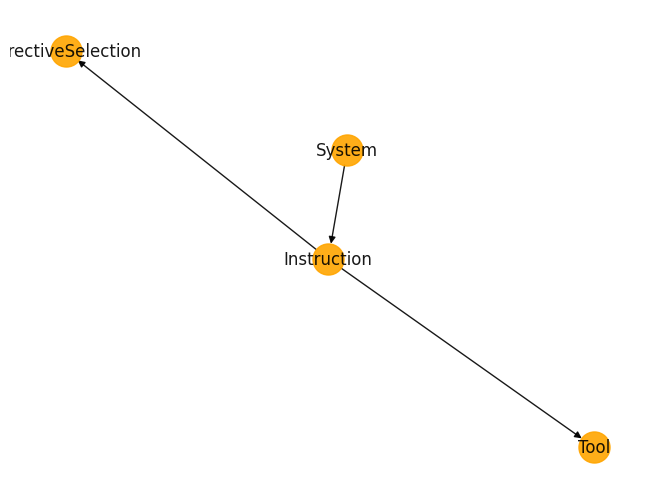

In [13]:
structure.display()

In [14]:
question1 = "A school is ordering laptops for its students. If each classroom has 25 students and the school wants to provide a laptop for each student in its 8 classrooms, how many laptops in total does the school need to order?"
question2 = "A bakery sells cupcakes in boxes of 6. If a customer wants to buy 8 boxes, with each person getting one cupcake, how many people can the customer serve cupcake to?"

import json

context = {"Question1": question1, "question2": question2}
context = json.dumps(context)

In [15]:
calc_result = await calc_mul.execute(context)

------------------Welcome: system--------------------


system: you are asked to perform as a function picker and parameter provider

user: Think step by step, understand the following basic math question and provide parameters for function calling.

assistant 88557f75e019eb1bf8e1fa325b78fbfa:


task: 
Follow the prompt and provide the necessary output.
- Additional instruction: Think step by step, understand the following basic math question and provide parameters for function calling.
- Additional context: {"Question1": "A school is ordering laptops for its students. If each classroom has 25 students and the school wants to provide a laptop for each student in its 8 classrooms, how many laptops in total does the school need to order?", "question2": "A bakery sells cupcakes in boxes of 6. If a customer wants to buy 8 boxes, with each person getting one cupcake, how many people can the customer serve cupcake to?"}
- Reason and prepare actions with GIVEN TOOLS ONLY.
- Give a numeric score in [0, 10] and precision of 0 decimal places.



reason: 
Let's think step by step. For Question 1, each classroom has 25 students and there are 8 classrooms. We need to multiply 25 by 8 to find the total number of laptops needed. For Question 2, each box contains 6 cupcakes and the customer wants to buy 8 boxes. We need to multiply 6 by 8 to find the total number of cupcakes, which equals the number of people who can be served.


actions: 
{'action_1': {'function': 'multiply', 'arguments': {'number1': 25, 'number2': 8}}, 'action_2': {'function': 'multiply', 'arguments': {'number1': 6, 'number2': 8}}}


action_required: 
True


answer: 
The school needs to order 200 laptops. The customer can serve cupcakes to 48 people.


score: 
10


tool_schema: 
{'tools': [{'type': 'function', 'function': {'name': 'multiply', 'description': 'Perform multiplication on two numbers.', 'parameters': {'type': 'object', 'properties': {'number1': {'type': 'number', 'description': 'First number to multiply.'}, 'number2': {'type': 'number', 'description': 'Second number to multiply.'}}, 'required': ['number1', 'number2']}}}]}


action_response: 
{'action_1': {'function': 'multiply', 'arguments': {'number1': 25, 'number2': 8}, 'output': 200}, 'action_2': {'function': 'multiply', 'arguments': {'number1': 6, 'number2': 8}, 'output': 48}}


action_performed: 
True


-----------------------------------------------------
